In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'/content/drive/MyDrive/Colab Notebooks/data/reviews_badminton/data.csv'
df = pd.read_csv(path)
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


## Exploratory Data Analysis

In [3]:
df.shape

(8518, 8)

In [4]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

Month              465
Place of Review     50
Reviewer Name       10
Review Title        10
Up Votes            10
Down Votes          10
Review text          8
Ratings              0
dtype: int64

In [7]:
df_dropna = df.dropna()
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [8]:
numerical_features = list(df_dropna.select_dtypes(include=['number']).columns)
categorical_features = list(df_dropna.select_dtypes(include=['object']).columns)

print(f"The numerical features are :: {numerical_features}")
print(f"The categorical features are :: {categorical_features}")

The numerical features are :: ['Up Votes', 'Down Votes', 'Ratings']
The categorical features are :: ['Reviewer Name', 'Review Title', 'Place of Review', 'Month', 'Review text']


In [9]:
discrete_df = df_dropna.select_dtypes(include=['object'])

numerical_df = df_dropna.select_dtypes(include=['int64', 'float64'])

In [10]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Up Votes,8013.0,0.386747,11.849649,0.0,0.0,0.0,0.0,889.0
Down Votes,8013.0,0.123424,3.334320,0.0,0.0,0.0,0.0,219.0
Ratings,8013.0,4.198178,1.244423,1.0,4.0,5.0,5.0,5.0


In [11]:
copy_df = df_dropna
copy_df.head()
copy_df.shape

(8013, 8)

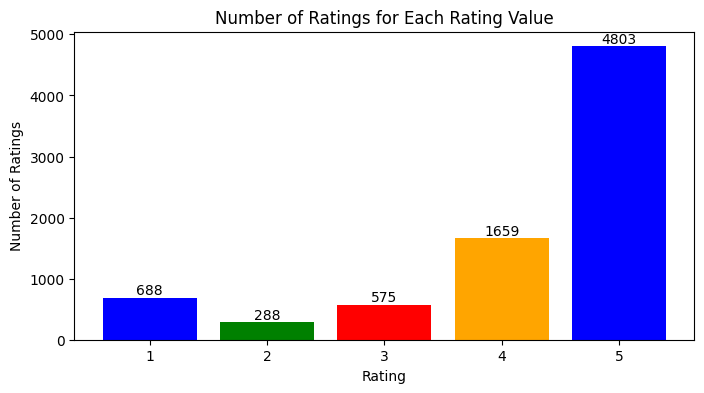

In [12]:
rating_counts = copy_df['Ratings'].value_counts()

rating_counts_sorted = rating_counts.sort_index()

plt.figure(figsize=(8, 4))
bars = plt.bar(rating_counts_sorted.index, rating_counts_sorted.values, color=['blue', 'green', 'red', 'orange'])
plt.title('Number of Ratings for Each Rating Value')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.show()


In [13]:
top_10_months = copy_df['Month'].value_counts().nlargest(10)
print(top_10_months)

Oct 2020    237
Dec 2018    223
Jul 2020    220
Aug 2020    208
Mar 2021    205
Sep 2020    200
Nov 2020    198
Nov 2018    189
Apr 2021    188
Jan 2019    188
Name: Month, dtype: int64


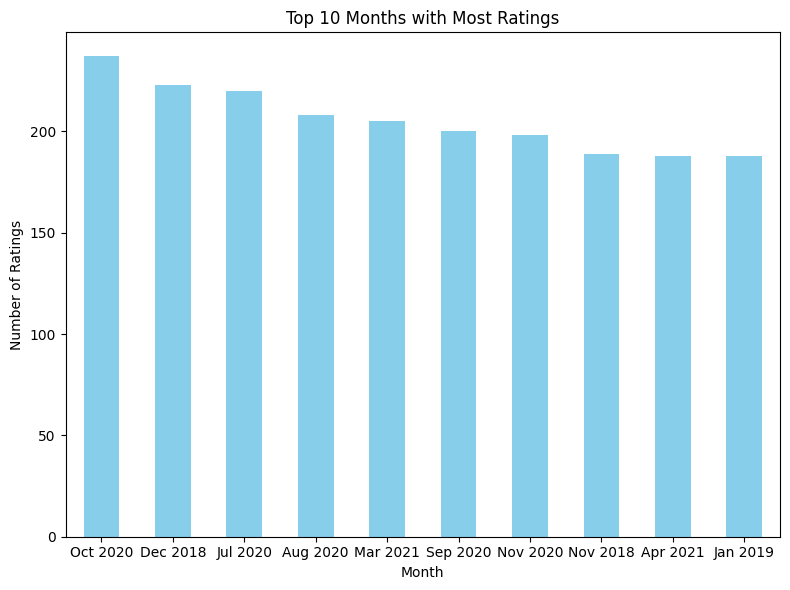

In [14]:
# top_10_months = copy_df['Month'].value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(8, 6))
top_10_months.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Months with Most Ratings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Data Prepocessing

In [15]:
# required imports
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
def preprocess_text(text):
    # Remove special characters, punctuation, emojis, and digits
    text = re.sub(r'[^\w\s]|(\d+)|[^\x00-\x7F]+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [17]:
# Convert 'Review text' column to string type
copy_df['Review text'] = copy_df['Review text'].astype(str)

# Apply text preprocessing to the 'Review text' column
copy_df['Cleaned Text'] = copy_df['Review text'].apply(preprocess_text)

# Print the DataFrame with cleaned text
print("DataFrame with Cleaned Text:")
print(copy_df[['Review text', 'Cleaned Text']])

<ipython-input-17-7dbc45647426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df['Review text'] = copy_df['Review text'].astype(str)


DataFrame with Cleaned Text:
                                            Review text  \
0     Nice product, good quality, but price is now r...   
1     They didn't supplied Yonex Mavis 350. Outside ...   
2     Worst product. Damaged shuttlecocks packed in ...   
5     Good quality product. Delivered on time.READ MORE   
6     BEST PURCHASE It is a good quality and is more...   
...                                                 ...   
8495  Thanks to the delivery boy ... Service is alwa...   
8496  Over priced even after 50% discount price is m...   
8497  Too much priced. It was getting me for Rs. 640...   
8499  Hii flipkart customers care..why your delivery...   
8507                       Nice delivery speedREAD MORE   

                                           Cleaned Text  
0     nice product good quality price rising bad sig...  
1     didnt supplied yonex mavis outside cover yonex...  
2     worst product damaged shuttlecock packed new b...  
5               good quality p

<ipython-input-17-7dbc45647426>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df['Cleaned Text'] = copy_df['Review text'].apply(preprocess_text)


In [18]:
copy_df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Cleaned Text
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,nice product good quality price rising bad sig...
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,didnt supplied yonex mavis outside cover yonex...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,worst product damaged shuttlecock packed new b...
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,good quality product delivered timeread
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,best purchase good quality durable average shu...


In [19]:
# create a sentiment column based on ratings
copy_df['sentiment'] = ['negative' if r <= 2 else ('positive' if r >= 4 else 'neutral') for r in copy_df['Ratings']]

<ipython-input-19-cc066f60f601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df['sentiment'] = ['negative' if r <= 2 else ('positive' if r >= 4 else 'neutral') for r in copy_df['Ratings']]


In [ ]:
copy_df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Cleaned Text,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,nice product good quality price rising bad sig...,positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,didnt supplied yonex mavis outside cover yonex...,negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,worst product damaged shuttlecock packed new b...,negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,Oct 2020,"Quite O. K. , but nowadays the quality of the...",3,quite k nowadays quality cork like year back u...,neutral
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,good quality product delivered timeread,positive


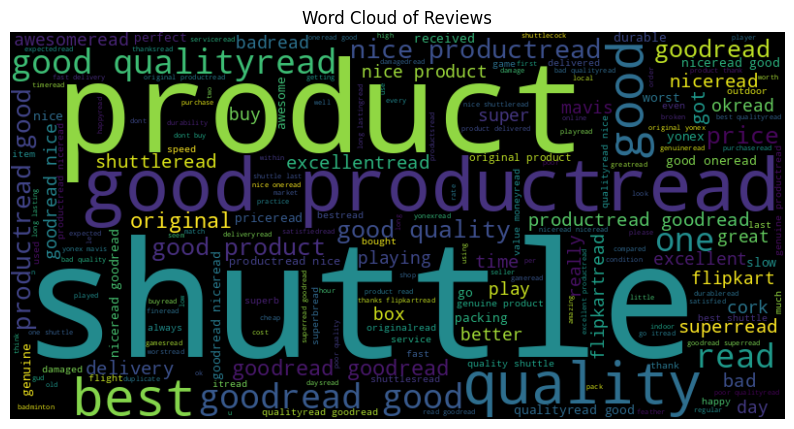

In [26]:
from wordcloud import WordCloud

# Step: Explore the most common words or phrases in the reviews using a word cloud
all_reviews = ' '.join(copy_df['Cleaned Text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_reviews)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

## Word cloud based on sentiment : Positive, Neutral and Negative

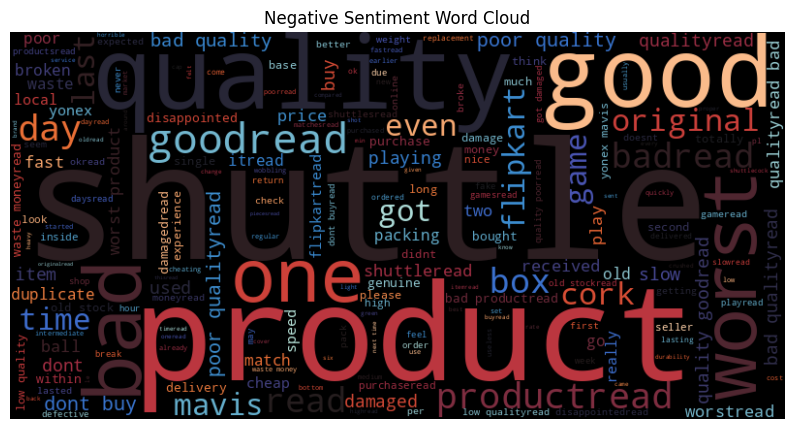

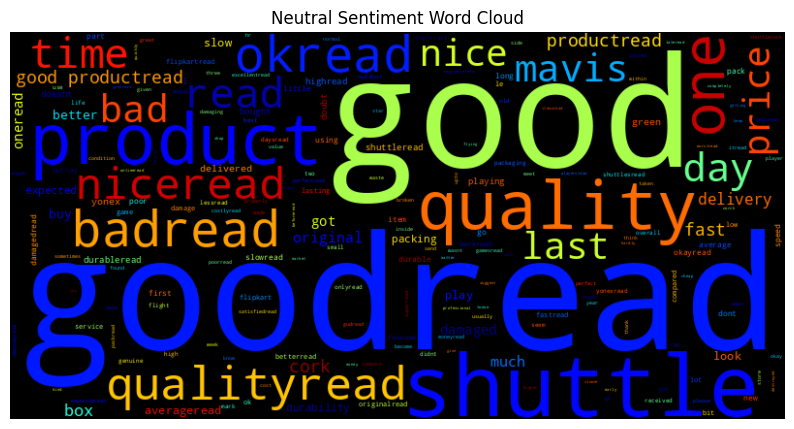

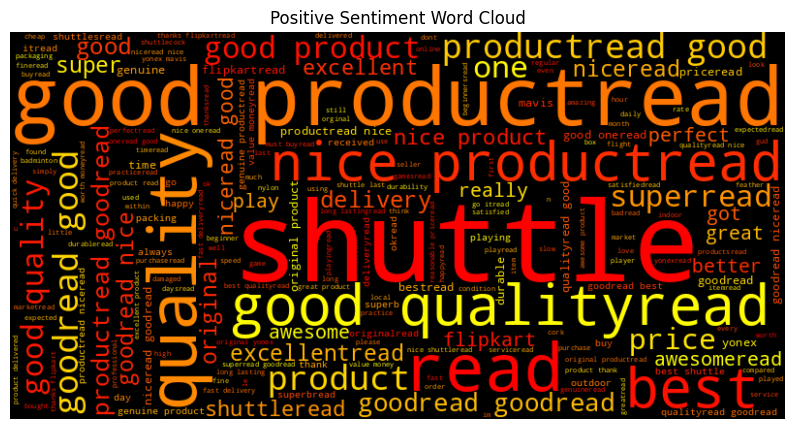

In [28]:
# Define sentiment colors (adjust as needed)
sentiment_colors = {'positive': 'autumn_r', 'negative': 'icefire_r', 'neutral': 'jet_r'}

def generate_sentiment_wordcloud(reviews_df, sentiment_column='sentiment'):
  """
  Function to generate sentiment-based word cloud
  """
  stopwords_list = set(stopwords.words('english'))

  # Group reviews by sentiment and create word clouds
  for sentiment, group_df in reviews_df.groupby(sentiment_column):
    sentiment_text = ' '.join(group_df['Cleaned Text'])

    # Filter out stopwords
    filtered_text = ' '.join([word for word in word_tokenize(sentiment_text) if word not in stopwords_list])

    # Create word cloud with color based on sentiment
    wordcloud = WordCloud(width=800, height=400, background_color='black',
                          colormap=sentiment_colors[sentiment]).generate(filtered_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment.capitalize()} Sentiment Word Cloud")
    plt.show()

# Example usage
generate_sentiment_wordcloud(copy_df)  # Replace 'copy_df' with your actual DataFrame

# Creating our machine learning model

Training Accuracy: 0.8833073322932917
Testing Accuracy: 0.859638178415471
F1-Score: 0.8313060805378989
Confusion Matrix:
 [[ 119    2   77]
 [  18    7   94]
 [  22   12 1252]]


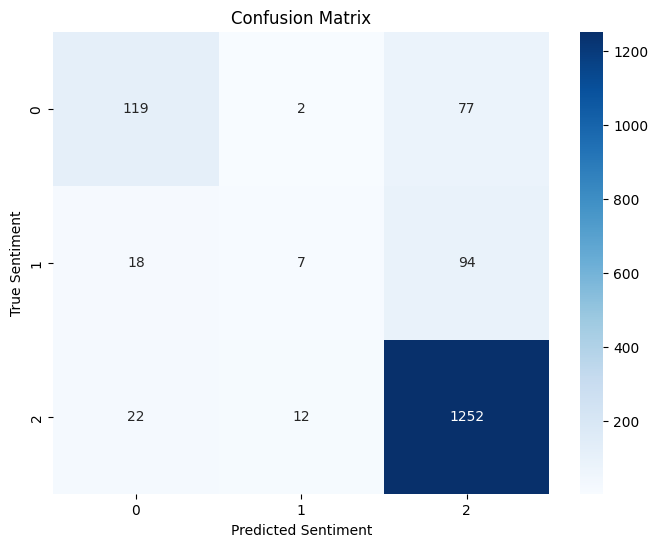

Predicted Sentiment for new review: positive


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(copy_df['Cleaned Text'].values)
X = X.toarray()
y = copy_df['sentiment'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Print training and testing accuracy
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))

# Model evaluation (F1-score)
predictions = clf.predict(X_test)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1-Score:", f1)

cm = confusion_matrix(y_test, predictions)  # Calculate confusion matrix

# Print Confusion Matrix
print("Confusion Matrix:\n", cm)

# Optional Visualization (using matplotlib)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Using seaborn for heatmap (optional)
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Confusion Matrix')
plt.show()

# Predict sentiment for a new review (example)
new_review = "The product is ok."
new_review_features = vectorizer.transform([preprocess_text(new_review)]).toarray()
prediction = clf.predict(new_review_features)[0]
print("Predicted Sentiment for new review:", prediction)

## Saving the model

In [31]:
import joblib

colab_path = f'/content/drive/MyDrive/Colab Notebooks/data/reviews_badminton/'

try:
  with open(f'{colab_path}model.pkl', 'wb') as f1:
    joblib.dump(clf, f1)
    print("Model saved")

  with open(f'{colab_path}vectorizer.pkl', 'wb') as f2:
    joblib.dump(vectorizer, f2)
    print("Vectorizer saved")

except Exception as e:
  print("Error saving model..", e)


Model saved
Vectorizer saved
